# 📊 Item (a): Resposta ao Degrau Unitário

## 🚢 Veículo Submersível Não-Tripulado

### 📋 Descrição do Problema

Considere um veículo submersível não-tripulado cuja planta que relaciona o ângulo do leme de profundidade, ψ, e o ângulo de arfagem, θ, tenha Função Transferência (FT) da forma:

$$\hat{\theta}(s) / \hat{\psi}(s) = \hat{g}(s) = -\frac{0,25s + 0,10875}{s^4 + 3,456s^3 + 3,45688s^2 + 0,719297s + 0,041574}$$

### 🎯 Objetivo do Exercício (a)

**Fazendo ψ(t) = 1(t), determine θ(t)**

Ou seja, determinar a resposta θ(t) do sistema quando a entrada é um degrau unitário.

### 📝 Metodologia

1. **Análise de Polos e Zeros**: Determinação das singularidades do sistema
2. **Expansão em Frações Parciais**: Decomposição para facilitar a transformada inversa
3. **Cálculo dos Resíduos**: Determinação dos coeficientes A_k
4. **Resposta Temporal**: Aplicação da transformada inversa de Laplace
5. **Análise de Características**: Estabilidade, valor final, tempo de assentamento

## 🔧 1. Configuração e Importações

Importação das bibliotecas necessárias para análise de sistemas de controle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step
from scipy.signal import residue

# Tratamento de importações opcionais
try:
    from control import tf, step_response
    control_available = True
    print("Biblioteca 'control' disponível")
except ImportError:
    control_available = False
    print("Biblioteca 'control' não disponível - usando apenas scipy")

# Verificar se sympy está disponível
try:
    import sympy as sp
    from sympy import symbols, latex, Rational, I, simplify, apart, expand
    from IPython.display import display, Latex, Math
    sympy_available = True
    print("Biblioteca 'sympy' disponível para renderização LaTeX")
except ImportError:
    sympy_available = False
    print("Biblioteca 'sympy' não disponível")

Biblioteca 'control' não disponível - usando apenas scipy
Biblioteca 'sympy' disponível para renderização LaTeX
Biblioteca 'sympy' disponível para renderização LaTeX


In [ ]:
def calcular_ganho_dc(sistema):
    """
    Calcula o ganho DC de um sistema LTI usando scipy.

    Args:
        sistema (scipy.signal.lti): Sistema LTI
    
    Returns:
        float: Ganho DC do sistema
    """
    # Para scipy.signal.lti, o ganho DC é calculado como num[0]/den[0] para s=0
    ganho_dc = sistema.num[-1] / sistema.den[-1]
    return ganho_dc

def definir_sistema_original():
    """
    Define o sistema original com os coeficientes dados.
    Sistema LTI: Sistema Linear e Invariante no Tempo

    Returns:
        scipy.signal.lti: Sistema LTI definido
    """
    # Coeficientes do numerador e denominador
    numerador = [-0.25, -0.10875]
    denominador = [1, 3.456, 3.45688, 0.719297, 0.041574]
    
    # Criação do sistema LTI
    sistema = lti(numerador, denominador)
    return sistema

## ⚙️ 2. Definições de Funções Auxiliares

Funções para análise do sistema de controle.

In [3]:
def exibir_polos(sistema):
    """
    Calcula e exibe os polos do sistema fornecido de forma detalhada.
    """
    polos = sistema.poles
    print("\n" + "="*50)
    print("ANÁLISE DOS POLOS DO SISTEMA")
    print("="*50)
    print(f"Número de polos: {len(polos)}")
    print("\nPolos do sistema:")
    
    for i, polo in enumerate(polos, 1):
        if np.isreal(polo):
            print(f"  p_{i} = {polo.real:.6f}")
        else:
            print(f"  p_{i} = {polo.real:.6f} {'+' if polo.imag >= 0 else ''}{polo.imag:.6f}j")
    
    # Verificar estabilidade
    polos_reais = np.real(polos)
    estavel = np.all(polos_reais < 0)
    print(f"\nEstabilidade: {'Estável' if estavel else 'Instável'}")
    if not estavel:
        polos_instáveis = polos[polos_reais >= 0]
        print(f"Polos instáveis: {polos_instáveis}")
    
    return polos

In [4]:
def calcular_zeros(sistema):
    """
    Calcula os zeros do sistema LTI.
    
    Args:
        sistema (scipy.signal.lti): Sistema LTI
    
    Returns:
        numpy.ndarray: Array com os zeros do sistema
    """
    zeros = sistema.zeros
    return zeros

def exibir_zeros(sistema):
    """
    Calcula e exibe os zeros do sistema fornecido de forma detalhada.
    """
    zeros = calcular_zeros(sistema)
    
    print("\n" + "="*50)
    print("ANÁLISE DOS ZEROS DO SISTEMA")
    print("="*50)
    
    if len(zeros) == 0:
        print("O sistema não possui zeros finitos.")
        print("Todos os zeros estão no infinito.")
    else:
        print(f"Número de zeros: {len(zeros)}")
        print("\nZeros do sistema:")
        
        for i, zero in enumerate(zeros, 1):
            if np.isreal(zero):
                print(f"  z_{i} = {zero.real:.6f}")
            else:
                print(f"  z_{i} = {zero.real:.6f} {'+' if zero.imag >= 0 else ''}{zero.imag:.6f}j")
    
    # Informações adicionais sobre zeros
    print(f"\nGrau do numerador: {len(sistema.num) - 1}")
    print(f"Grau do denominador: {len(sistema.den) - 1}")
    print(f"Número de zeros no infinito: {len(sistema.den) - len(sistema.num)}")
    
    return zeros

def analisar_polos_zeros(sistema):
    """
    Análise completa de polos e zeros do sistema.
    """
    print("🔍 ANÁLISE COMPLETA DE POLOS E ZEROS")
    print("=" * 60)
    
    # Calcular polos e zeros
    polos = sistema.poles
    zeros = calcular_zeros(sistema)
    
    # Exibir polos
    polos_result = exibir_polos(sistema)
    
    # Exibir zeros
    zeros_result = exibir_zeros(sistema)
    
    # Análise de estabilidade e características
    print("\n" + "="*50)
    print("CARACTERÍSTICAS DO SISTEMA")
    print("="*50)
    
    # Estabilidade
    polos_reais = np.real(polos)
    estavel = np.all(polos_reais < 0)
    print(f"Sistema estável: {'Sim' if estavel else 'Não'}")
    
    # Tipo do sistema
    num_polos_origem = np.sum(np.abs(polos) < 1e-10)
    print(f"Tipo do sistema: {num_polos_origem}")
    
    # Ganho DC
    ganho_dc = calcular_ganho_dc(sistema)
    print(f"Ganho DC: {ganho_dc:.6f}")
    
    # Ordem do sistema
    print(f"Ordem do sistema: {len(polos)}")
    
    return polos, zeros

In [5]:

def calcular_expansao_fracoes_parciais(sistema):
    """
    Calcula a expansão em frações parciais para θ̂(s) = Ĝ(s)/s
    onde Ĝ(s) é a função de transferência do sistema e a entrada é um degrau unitário (1/s).
    
    Para um degrau unitário, θ̂(s) = Ĝ(s) * (1/s) = Ĝ(s)/s
    
    Args:
        sistema (scipy.signal.lti): Sistema LTI original
    
    Returns:
        tuple: (residuos, polos_expandidos, termos_diretos)
    """
    print("\n" + "="*60)
    print("EXPANSÃO EM FRAÇÕES PARCIAIS")
    print("="*60)
    
    # Para resposta ao degrau, precisamos calcular G(s)/s
    # Isso equivale a adicionar um polo em s=0
    
    # Numerador original
    num_original = sistema.num
    # Denominador com polo adicional em s=0: s * denominador_original
    den_expandido = np.convolve([1, 0], sistema.den)  # Multiplica por s
    
    print("Para entrada degrau unitário ψ(t) = 1(t), temos Ψ̂(s) = 1/s")
    print("Portanto: θ̂(s) = Ĝ(s) * Ψ̂(s) = Ĝ(s)/s")
    print(f"Numerador: {num_original}")
    print(f"Denominador expandido (s * denominador original): {den_expandido}")
    
    # Calcular a expansão em frações parciais
    residuos, polos_expandidos, termos_diretos = residue(num_original, den_expandido)
    
    print(f"\nNúmero de termos na expansão: {len(residuos)}")
    print(f"Polos (incluindo o polo em s=0): {len(polos_expandidos)}")
    
    return residuos, polos_expandidos, termos_diretos

def exibir_expansao_fracoes_parciais(residuos, polos, termos_diretos):
    """
    Exibe a expansão em frações parciais de forma organizada.
    """
    print("\n" + "-"*50)
    print("EXPANSÃO EM FRAÇÕES PARCIAIS - θ̂(s)")
    print("-"*50)
    
    # Identificar o termo com polo em s=0 (A1/s)
    polo_zero_idx = None
    for i, polo in enumerate(polos):
        if abs(polo) < 1e-10:  # Polo próximo de zero
            polo_zero_idx = i
            break
    
    print("θ̂(s) = ", end="")
    
    # Exibir termo A1/s primeiro (se existir)
    if polo_zero_idx is not None:
        A1 = residuos[polo_zero_idx]
        print(f"{A1:.6f}/s", end="")
        
        # Exibir os outros termos
        for i, (A_k, p_k) in enumerate(zip(residuos, polos)):
            if i != polo_zero_idx:  # Pular o termo A1/s
                if np.isreal(p_k) and np.isreal(A_k):
                    sinal = " + " if A_k.real >= 0 else " - "
                    print(f"{sinal}{abs(A_k.real):.6f}/(s - ({p_k.real:.6f}))", end="")
                else:
                    # Números complexos
                    sinal = " + " if A_k.real >= 0 else " - "
                    if abs(p_k.imag) < 1e-10:  # Polo real
                        print(f"{sinal}{abs(A_k.real):.6f}/(s - ({p_k.real:.6f}))", end="")
                    else:  # Polo complexo
                        print(f"{sinal}[{A_k:.6f}]/(s - ({p_k:.6f}))", end="")
    
    print()  # Nova linha
    
    # Exibir resíduos detalhadamente
    print("\nCoeficientes (Resíduos) A_k:")
    for i, (A_k, p_k) in enumerate(zip(residuos, polos), 1):
        if abs(p_k) < 1e-10:  # Polo em s=0
            print(f"  A_{i} = {A_k:.6f} (para polo p_{i} = 0)")
        elif np.isreal(A_k) and np.isreal(p_k):
            print(f"  A_{i} = {A_k.real:.6f} (para polo p_{i} = {p_k.real:.6f})")
        else:
            print(f"  A_{i} = {A_k:.6f} (para polo p_{i} = {p_k:.6f})")
    
    # Termos diretos (se existirem)
    if len(termos_diretos) > 0 and not np.allclose(termos_diretos, 0):
        print(f"\nTermos diretos (constantes): {termos_diretos}")
    
    return

## 🎯 3. Análise de Polos e Zeros

Análise das singularidades do sistema para entender seu comportamento dinâmico.

In [6]:
# Definir o sistema e realizar análise completa de polos e zeros
sistema = definir_sistema_original()
polos_sistema, zeros_sistema = analisar_polos_zeros(sistema)

🔍 ANÁLISE COMPLETA DE POLOS E ZEROS

ANÁLISE DOS POLOS DO SISTEMA
Número de polos: 4

Polos do sistema:
  p_1 = -1.600689 +0.252393j
  p_2 = -1.600689 -0.252393j
  p_3 = -0.146695
  p_4 = -0.107926

Estabilidade: Estável

ANÁLISE DOS ZEROS DO SISTEMA
Número de zeros: 1

Zeros do sistema:
  z_1 = -0.435000

Grau do numerador: 1
Grau do denominador: 4
Número de zeros no infinito: 3

CARACTERÍSTICAS DO SISTEMA
Sistema estável: Sim
Tipo do sistema: 0
Ganho DC: -2.615818
Ordem do sistema: 4


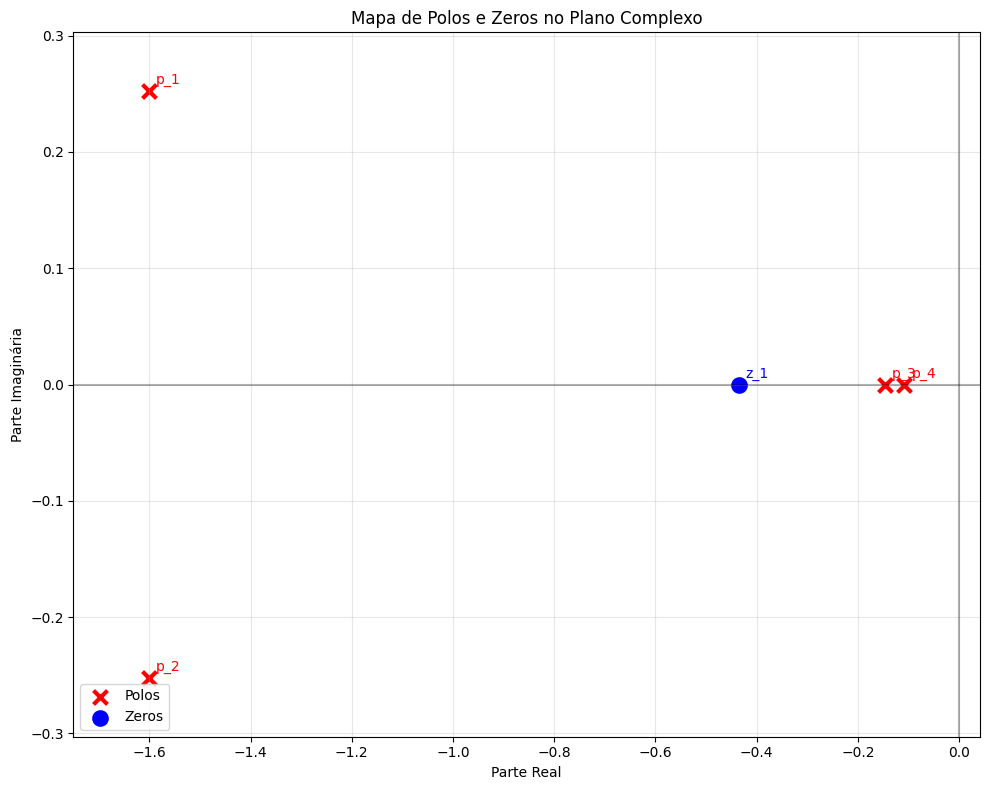

In [7]:
def plotar_mapa_polos_zeros(sistema):
    """
    Plota o mapa de polos e zeros no plano complexo.
    """
    polos = sistema.poles
    zeros = sistema.zeros
    
    plt.figure(figsize=(10, 8))
    
    # Plotar polos
    polos_reais = np.real(polos)
    polos_imag = np.imag(polos)
    plt.scatter(polos_reais, polos_imag, c='red', s=100, marker='x', linewidth=3, label='Polos')
    
    # Plotar zeros
    if len(zeros) > 0:
        zeros_reais = np.real(zeros)
        zeros_imag = np.imag(zeros)
        plt.scatter(zeros_reais, zeros_imag, c='blue', s=100, marker='o', linewidth=2, 
                   facecolors='none', edgecolors='blue', label='Zeros')
    
    # Linhas de referência
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    # Grid e formatação
    plt.grid(True, alpha=0.3)
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.title('Mapa de Polos e Zeros no Plano Complexo')
    plt.legend()
    
    # Adicionar anotações
    for i, (real, imag) in enumerate(zip(polos_reais, polos_imag), 1):
        plt.annotate(f'p_{i}', (real, imag), xytext=(5, 5), textcoords='offset points', color='red')
    
    if len(zeros) > 0:
        for i, (real, imag) in enumerate(zip(zeros_reais, zeros_imag), 1):
            plt.annotate(f'z_{i}', (real, imag), xytext=(5, 5), textcoords='offset points', color='blue')
    
    # Ajustar limites para melhor visualização
    all_reals = np.concatenate([polos_reais, zeros_reais if len(zeros) > 0 else []])
    all_imags = np.concatenate([polos_imag, zeros_imag if len(zeros) > 0 else []])
    
    x_margin = 0.1 * (max(all_reals) - min(all_reals)) if len(all_reals) > 1 else 0.5
    y_margin = 0.1 * (max(all_imags) - min(all_imags)) if len(all_imags) > 1 else 0.5
    
    plt.xlim(min(all_reals) - x_margin, max(all_reals) + x_margin)
    plt.ylim(min(all_imags) - y_margin, max(all_imags) + y_margin)
    
    plt.tight_layout()
    plt.show()
    
    return

# Plotar o mapa de polos e zeros
plotar_mapa_polos_zeros(sistema)

In [8]:
def resolver_item_a():
    """
    Resolve o item (a): Resposta ao degrau unitário com análise completa.

    Returns:
        tuple: (t, y, sistema, residuos, polos_expandidos) 
    """
    print("=" * 60)
    print("ITEM (a): RESPOSTA AO DEGRAU UNITÁRIO")
    print("=" * 60)
    
    # Definir o sistema
    sistema = definir_sistema_original()
    
    # Exibir a função de transferência
    print("\nFunção de Transferência do Sistema:")
    print("G(s) = (-0.25s - 0.10875) / (s⁴ + 3.456s³ + 3.45688s² + 0.719297s + 0.041574)")
    print(f"Numerador: {sistema.num}")
    print(f"Denominador: {sistema.den}")
    
    # Análise dos polos do sistema original
    polos = exibir_polos(sistema)
    
    # Calcular e exibir a expansão em frações parciais
    residuos, polos_expandidos, termos_diretos = calcular_expansao_fracoes_parciais(sistema)
    exibir_expansao_fracoes_parciais(residuos, polos_expandidos, termos_diretos)
    
    # Resposta ao degrau
    print("\n" + "="*50)
    print("RESPOSTA TEMPORAL")
    print("="*50)
    
    t, y = step(sistema)
    
    # Calcular propriedades da resposta
    valor_final = y[-1]
    ganho_dc = calcular_ganho_dc(sistema)
    
    print(f"\nCaracterísticas da Resposta ao Degrau:")
    print(f"Ganho DC: {ganho_dc:.6f}")
    print(f"Valor final da resposta: {valor_final:.6f}")
    
    # Verificar tempo de assentamento (2% do valor final)
    tolerancia = 0.02 * abs(valor_final)
    indices_assentamento = np.where(np.abs(y - valor_final) <= tolerancia)[0]
    if len(indices_assentamento) > 0:
        tempo_assentamento = t[indices_assentamento[0]]
        print(f"Tempo de assentamento (2%): {tempo_assentamento:.3f} s")
    
    # Plotar a resposta
    plt.figure(figsize=(12, 8))
    
    # Subplot 1: Resposta temporal
    plt.subplot(2, 1, 1)
    plt.plot(t, y, 'b-', linewidth=2, label='θ(t)')
    plt.axhline(y=valor_final, color='r', linestyle='--', alpha=0.7, label=f'Valor final = {valor_final:.4f}')
    plt.grid(True, alpha=0.3)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.title('Resposta ao Degrau Unitário - θ(t) para ψ(t) = 1(t)')
    plt.legend()
    plt.xlim(0, max(t))
    
    # Subplot 2: Polos no plano complexo
    plt.subplot(2, 1, 2)
    polos_reais = np.real(polos)
    polos_imag = np.imag(polos)
    plt.scatter(polos_reais, polos_imag, c='red', s=100, marker='x', linewidth=3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.title('Localização dos Polos no Plano Complexo')
    
    # Adicionar anotações dos polos
    for i, (real, imag) in enumerate(zip(polos_reais, polos_imag), 1):
        plt.annotate(f'p_{i}', (real, imag), xytext=(5, 5), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()
    
    return t, y, sistema, residuos, polos_expandidos

## 📈 4. Resposta ao Degrau Unitário

Cálculo da resposta temporal usando expansão em frações parciais.

ITEM (a): RESPOSTA AO DEGRAU UNITÁRIO

Função de Transferência do Sistema:
G(s) = (-0.25s - 0.10875) / (s⁴ + 3.456s³ + 3.45688s² + 0.719297s + 0.041574)
Numerador: [-0.25    -0.10875]
Denominador: [1.       3.456    3.45688  0.719297 0.041574]

ANÁLISE DOS POLOS DO SISTEMA
Número de polos: 4

Polos do sistema:
  p_1 = -1.600689 +0.252393j
  p_2 = -1.600689 -0.252393j
  p_3 = -0.146695
  p_4 = -0.107926

Estabilidade: Estável

EXPANSÃO EM FRAÇÕES PARCIAIS
Para entrada degrau unitário ψ(t) = 1(t), temos Ψ̂(s) = 1/s
Portanto: θ̂(s) = Ĝ(s) * Ψ̂(s) = Ĝ(s)/s
Numerador: [-0.25    -0.10875]
Denominador expandido (s * denominador original): [1.       3.456    3.45688  0.719297 0.041574 0.      ]

Número de termos na expansão: 5
Polos (incluindo o polo em s=0): 5

--------------------------------------------------
EXPANSÃO EM FRAÇÕES PARCIAIS - θ̂(s)
--------------------------------------------------
θ̂(s) = -2.615818+0.000000j/s + 8.526170/(s - (-0.107926)) - 5.819381/(s - (-0.146695)) - [-0.04

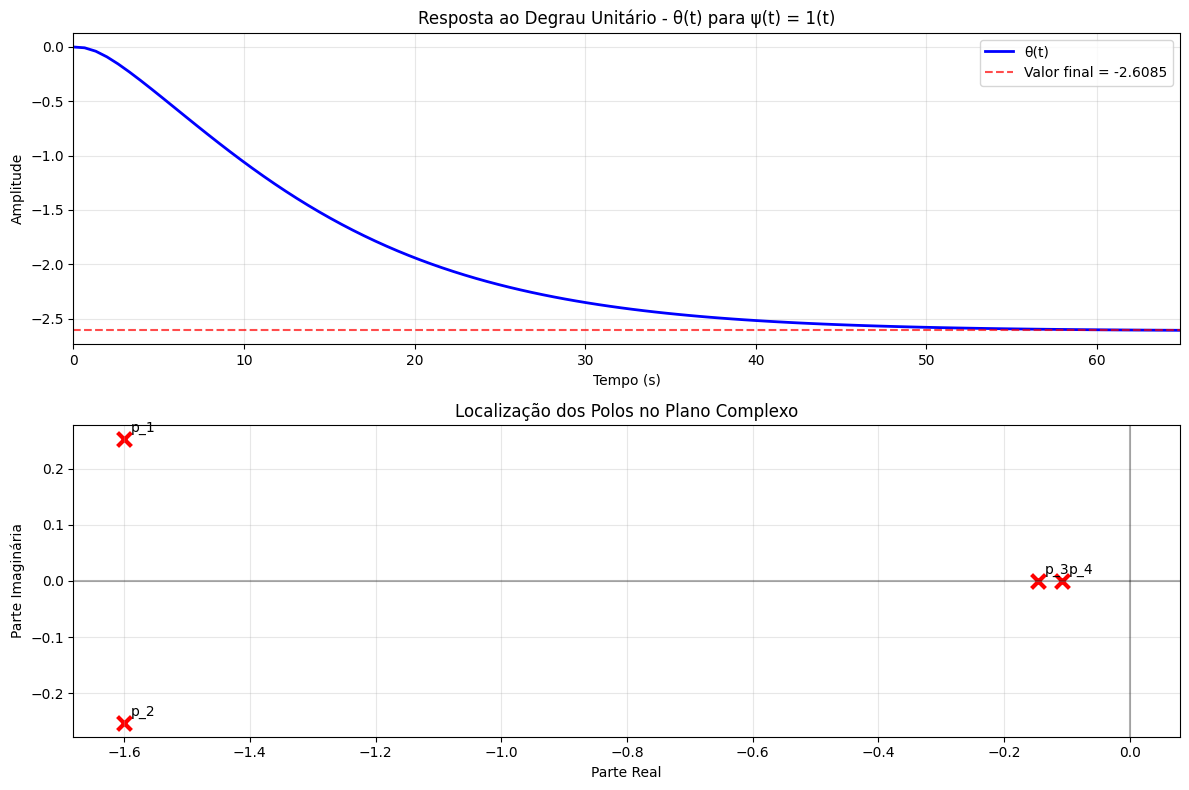

In [19]:
# Executar a resolução do item (a)
t, y, sistema, residuos, polos_expandidos = resolver_item_a()

In [10]:
def mostrar_resumo_matematico(residuos, polos_expandidos):
    """
    Mostra um resumo matemático da expansão em frações parciais.
    """
    print("\n" + "="*70)
    print("RESUMO MATEMÁTICO DA EXPANSÃO EM FRAÇÕES PARCIAIS")
    print("="*70)
    
    # Identificar o polo em s=0
    polo_zero_idx = None
    for i, polo in enumerate(polos_expandidos):
        if abs(polo) < 1e-10:
            polo_zero_idx = i
            break
    
    print("Para a entrada degrau unitário ψ(t) = 1(t), a transformada é:")
    print("Ψ̂(s) = 1/s")
    print()
    print("A resposta no domínio de Laplace é:")
    print("θ̂(s) = Ĝ(s) × Ψ̂(s) = Ĝ(s)/s")
    print()
    
    print("Expandindo em frações parciais:")
    if polo_zero_idx is not None:
        print("θ̂(s) = A₁/s + A₂/(s-p₂) + A₃/(s-p₃) + A₄/(s-p₄) + A₅/(s-p₅)")
        print()
        print("Onde:")
        print(f"• A₁ = {residuos[polo_zero_idx]:.6f} (resíduo para o polo em s = 0)")
        
        contador = 2
        for i, (A_k, p_k) in enumerate(zip(residuos, polos_expandidos)):
            if i != polo_zero_idx:
                if np.isreal(A_k) and np.isreal(p_k):
                    print(f"• A₍{contador}₎ = {A_k.real:.6f}, p₍{contador}₎ = {p_k.real:.6f}")
                else:
                    print(f"• A₍{contador}₎ = {A_k:.6f}, p₍{contador}₎ = {p_k:.6f}")
                contador += 1
    
    print()
    print("A resposta temporal θ(t) é obtida aplicando a transformada inversa de Laplace:")
    print("θ(t) = L⁻¹{θ̂(s)}")
    print()
    print("Para cada termo da forma A/(s-p), a transformada inversa é:")
    print("L⁻¹{A/(s-p)} = A·e^(pt)·u(t)")
    print("onde u(t) é a função degrau unitário.")
    
    return

# Mostrar o resumo matemático
mostrar_resumo_matematico(residuos, polos_expandidos)


RESUMO MATEMÁTICO DA EXPANSÃO EM FRAÇÕES PARCIAIS
Para a entrada degrau unitário ψ(t) = 1(t), a transformada é:
Ψ̂(s) = 1/s

A resposta no domínio de Laplace é:
θ̂(s) = Ĝ(s) × Ψ̂(s) = Ĝ(s)/s

Expandindo em frações parciais:
θ̂(s) = A₁/s + A₂/(s-p₂) + A₃/(s-p₃) + A₄/(s-p₄) + A₅/(s-p₅)

Onde:
• A₁ = -2.615818+0.000000j (resíduo para o polo em s = 0)
• A₍2₎ = 8.526170, p₍2₎ = -0.107926
• A₍3₎ = -5.819381, p₍3₎ = -0.146695
• A₍4₎ = -0.045486-0.156687j, p₍4₎ = -1.600689-0.252393j
• A₍5₎ = -0.045486+0.156687j, p₍5₎ = -1.600689+0.252393j

A resposta temporal θ(t) é obtida aplicando a transformada inversa de Laplace:
θ(t) = L⁻¹{θ̂(s)}

Para cada termo da forma A/(s-p), a transformada inversa é:
L⁻¹{A/(s-p)} = A·e^(pt)·u(t)
onde u(t) é a função degrau unitário.


In [11]:
def mostrar_expressao_temporal(residuos, polos_expandidos):
    """
    Mostra a expressão final da resposta temporal θ(t).
    """
    print("\n" + "="*70)
    print("EXPRESSÃO FINAL DA RESPOSTA TEMPORAL θ(t)")
    print("="*70)
    
    # Identificar o polo em s=0
    polo_zero_idx = None
    for i, polo in enumerate(polos_expandidos):
        if abs(polo) < 1e-10:
            polo_zero_idx = i
            break
    
    print("Aplicando a transformada inversa de Laplace term by term:")
    print()
    
    if polo_zero_idx is not None:
        A1 = residuos[polo_zero_idx].real
        print(f"θ(t) = {A1:.6f}·u(t)", end="")
        
        contador = 2
        for i, (A_k, p_k) in enumerate(zip(residuos, polos_expandidos)):
            if i != polo_zero_idx:
                if np.isreal(A_k) and np.isreal(p_k):
                    sinal = " + " if A_k.real >= 0 else " - "
                    print(f"{sinal}{abs(A_k.real):.6f}·e^({p_k.real:.6f}t)·u(t)", end="")
                else:
                    # Para polos complexos conjugados, combinar os termos
                    if p_k.imag > 0:  # Apenas processar o polo com parte imaginária positiva
                        # Encontrar o conjugado
                        conjugado_idx = None
                        for j, p_conj in enumerate(polos_expandidos):
                            if j != i and abs(p_conj - np.conj(p_k)) < 1e-10:
                                conjugado_idx = j
                                break
                        
                        if conjugado_idx is not None:
                            A_conj = residuos[conjugado_idx]
                            # Para polos complexos conjugados, a resposta é da forma:
                            # 2*Re(A)*e^(σt)*cos(ωt + φ)*u(t)
                            sigma = p_k.real
                            omega = abs(p_k.imag)
                            magnitude = 2 * abs(A_k)
                            phase = np.angle(A_k)
                            
                            sinal = " + " if magnitude >= 0 else " - "
                            print(f"{sinal}{abs(magnitude):.6f}·e^({sigma:.6f}t)·cos({omega:.6f}t + {phase:.6f})·u(t)", end="")
                contador += 1
    
    print()
    print()
    print("Onde:")
    print("• u(t) é a função degrau unitário")
    print("• Os termos exponenciais representam as componentes dos modos naturais")
    print("• Os polos complexos conjugados resultam em oscilações amortecidas")
    print(f"• O valor final é θ(∞) = {A1:.6f} (contribuição do polo em s=0)")
    
    return

# Mostrar a expressão temporal final
mostrar_expressao_temporal(residuos, polos_expandidos)


EXPRESSÃO FINAL DA RESPOSTA TEMPORAL θ(t)
Aplicando a transformada inversa de Laplace term by term:

θ(t) = -2.615818·u(t) + 8.526170·e^(-0.107926t)·u(t) - 5.819381·e^(-0.146695t)·u(t) + 0.326312·e^(-1.600689t)·cos(0.252393t + 1.853327)·u(t)

Onde:
• u(t) é a função degrau unitário
• Os termos exponenciais representam as componentes dos modos naturais
• Os polos complexos conjugados resultam em oscilações amortecidas
• O valor final é θ(∞) = -2.615818 (contribuição do polo em s=0)


## 🔢 5. Apresentação Matemática em LaTeX

Renderização das equações matemáticas em formato LaTeX para melhor visualização.

In [12]:
def exibir_latex_polos(polos):
    """
    Exibe os polos do sistema em LaTeX.
    """
    if not sympy_available:
        print("Sympy não disponível para renderização LaTeX")
        return
    
    print("\n" + "="*60)
    print("POLOS DO SISTEMA EM LaTeX")
    print("="*60)
    
    print("Os polos do sistema são:")
    
    for i, polo in enumerate(polos, 1):
        if np.isreal(polo):
            # Polo real
            pole_latex = f"p_{i} = {polo.real:.6f}"
        else:
            # Polo complexo
            if polo.imag >= 0:
                pole_latex = f"p_{i} = {polo.real:.6f} + {polo.imag:.6f}j"
            else:
                pole_latex = f"p_{i} = {polo.real:.6f} - {abs(polo.imag):.6f}j"
        
        display(Math(pole_latex))
    
    return


In [13]:
def exibir_latex_funcao_transferencia(sistema):
    """
    Exibe a função de transferência em LaTeX usando sympy.
    """
    if not sympy_available:
        print("Sympy não disponível para renderização LaTeX")
        return
    
    print("="*60)
    print("FUNÇÃO DE TRANSFERÊNCIA EM LaTeX")
    print("="*60)
    
    s = symbols('s')
    
    # Criar numerador em sympy
    num_coeffs = sistema.num
    num_poly = sum(coeff * s**(len(num_coeffs)-1-i) for i, coeff in enumerate(num_coeffs))
    
    # Criar denominador em sympy  
    den_coeffs = sistema.den
    den_poly = sum(coeff * s**(len(den_coeffs)-1-i) for i, coeff in enumerate(den_coeffs))
    
    # Função de transferência
    G_s = num_poly / den_poly
    
    print("Função de Transferência G(s):")
    display(Math(r'\hat{G}(s) = ' + latex(G_s)))
    
    return G_s

In [14]:
def exibir_latex_expansao_fracoes_parciais(residuos, polos_expandidos, sistema):
    """
    Exibe a expansão em frações parciais em LaTeX.
    """
    if not sympy_available:
        print("Sympy não disponível para renderização LaTeX")
        return
    
    print("\n" + "="*60)
    print("EXPANSÃO EM FRAÇÕES PARCIAIS EM LaTeX")
    print("="*60)
    
    s = symbols('s')
    
    # Para entrada degrau: θ̂(s) = Ĝ(s)/s
    print("Para entrada degrau unitário:")
    display(Math(r'\psi(t) = 1(t) \quad \Rightarrow \quad \hat{\Psi}(s) = \frac{1}{s}'))
    
    print("\nResposta no domínio de Laplace:")
    display(Math(r'\hat{\theta}(s) = \hat{G}(s) \cdot \hat{\Psi}(s) = \frac{\hat{G}(s)}{s}'))
    
    # Identificar o polo em s=0
    polo_zero_idx = None
    for i, polo in enumerate(polos_expandidos):
        if abs(polo) < 1e-10:
            polo_zero_idx = i
            break
    
    # Construir a expansão em frações parciais
    print("\nExpansão em frações parciais:")
    
    # Construir a equação LaTeX
    termos = []
    
    if polo_zero_idx is not None:
        A1 = residuos[polo_zero_idx]
        termos.append(f"\\frac{{{A1.real:.6f}}}{{s}}")
        
        contador = 2
        for i, (A_k, p_k) in enumerate(zip(residuos, polos_expandidos)):
            if i != polo_zero_idx:
                if np.isreal(A_k) and np.isreal(p_k):
                    if A_k.real >= 0:
                        termos.append(f"\\frac{{{A_k.real:.6f}}}{{s - ({p_k.real:.6f})}}")
                    else:
                        termos.append(f"\\frac{{{A_k.real:.6f}}}{{s - ({p_k.real:.6f})}}")
                else:
                    # Número complexo
                    if A_k.real >= 0 and A_k.imag >= 0:
                        termos.append(f"\\frac{{{A_k.real:.6f} + {A_k.imag:.6f}j}}{{s - ({p_k.real:.6f} + {p_k.imag:.6f}j)}}")
                    elif A_k.real >= 0 and A_k.imag < 0:
                        termos.append(f"\\frac{{{A_k.real:.6f} - {abs(A_k.imag):.6f}j}}{{s - ({p_k.real:.6f} - {abs(p_k.imag):.6f}j)}}")
                    elif A_k.real < 0 and A_k.imag >= 0:
                        termos.append(f"\\frac{{{A_k.real:.6f} + {A_k.imag:.6f}j}}{{s - ({p_k.real:.6f} + {p_k.imag:.6f}j)}}")
                    else:
                        termos.append(f"\\frac{{{A_k.real:.6f} - {abs(A_k.imag):.6f}j}}{{s - ({p_k.real:.6f} - {abs(p_k.imag):.6f}j)}}")
                
                contador += 1
    
    # Montar a equação completa
    equacao_latex = r'\hat{\theta}(s) = ' + ' + '.join(termos)
    display(Math(equacao_latex))
    
    # Exibir os resíduos individualmente
    print("\nCoeficientes (Resíduos):")
    for i, (A_k, p_k) in enumerate(zip(residuos, polos_expandidos), 1):
        if abs(p_k) < 1e-10:  # Polo em s=0
            display(Math(f"A_{i} = {A_k.real:.6f} \\quad \\text{{(para polo }} p_{i} = 0\\text{{)}}"))
        elif np.isreal(A_k) and np.isreal(p_k):
            display(Math(f"A_{i} = {A_k.real:.6f} \\quad \\text{{(para polo }} p_{i} = {p_k.real:.6f}\\text{{)}}"))
        else:
            if p_k.imag >= 0:
                display(Math(f"A_{i} = {A_k.real:.6f} + {A_k.imag:.6f}j \\quad \\text{{(para polo }} p_{i} = {p_k.real:.6f} + {p_k.imag:.6f}j\\text{{)}}"))
            else:
                display(Math(f"A_{i} = {A_k.real:.6f} - {abs(A_k.imag):.6f}j \\quad \\text{{(para polo }} p_{i} = {p_k.real:.6f} - {abs(p_k.imag):.6f}j\\text{{)}}"))
    
    return

In [15]:
def exibir_latex_resposta_temporal(residuos, polos_expandidos):
    """
    Exibe a resposta temporal em LaTeX.
    """
    if not sympy_available:
        print("Sympy não disponível para renderização LaTeX")
        return
    
    print("\n" + "="*60)
    print("RESPOSTA TEMPORAL EM LaTeX")
    print("="*60)
    
    print("Aplicando a transformada inversa de Laplace:")
    display(Math(r'\theta(t) = \mathcal{L}^{-1}\{\hat{\theta}(s)\}'))
    
    # Identificar o polo em s=0
    polo_zero_idx = None
    for i, polo in enumerate(polos_expandidos):
        if abs(polo) < 1e-10:
            polo_zero_idx = i
            break
    
    # Construir os termos da resposta temporal
    termos_temporais = []
    
    if polo_zero_idx is not None:
        A1 = residuos[polo_zero_idx].real
        termos_temporais.append(f"{A1:.6f}")
        
        for i, (A_k, p_k) in enumerate(zip(residuos, polos_expandidos)):
            if i != polo_zero_idx:
                if np.isreal(A_k) and np.isreal(p_k):
                    if A_k.real >= 0:
                        termos_temporais.append(f"{A_k.real:.6f} e^{{{p_k.real:.6f}t}}")
                    else:
                        termos_temporais.append(f"{A_k.real:.6f} e^{{{p_k.real:.6f}t}}")
                else:
                    # Para polos complexos conjugados, criar termo cosseno
                    if p_k.imag > 0:  # Apenas processar o polo com parte imaginária positiva
                        sigma = p_k.real
                        omega = abs(p_k.imag)
                        magnitude = 2 * abs(A_k)
                        phase = np.angle(A_k)
                        
                        if magnitude >= 0:
                            termos_temporais.append(f"{magnitude:.6f} e^{{{sigma:.6f}t}} \\cos({omega:.6f}t + {phase:.6f})")
                        else:
                            termos_temporais.append(f"{magnitude:.6f} e^{{{sigma:.6f}t}} \\cos({omega:.6f}t + {phase:.6f})")
    
    # Montar a equação temporal completa
    equacao_temporal = r'\theta(t) = \left[' + ' + '.join(termos_temporais) + r'\right] u(t)'
    display(Math(equacao_temporal))
    
    # Valor final
    display(Math(f"\\theta(\\infty) = {residuos[polo_zero_idx].real:.6f}"))
    
    return

In [16]:
def apresentacao_latex_completa(sistema, residuos, polos_expandidos):
    """
    Apresentação completa e organizada de todas as equações em LaTeX.
    """
    if not sympy_available:
        print("Sympy não disponível para renderização LaTeX")
        return
    
    print("\n" + "🎯" + "="*68 + "🎯")
    print("📐 APRESENTAÇÃO MATEMÁTICA COMPLETA EM LaTeX 📐")
    print("🎯" + "="*68 + "🎯")
    
    # 1. Função de Transferência Original
    print("\n1️⃣ FUNÇÃO DE TRANSFERÊNCIA DO SISTEMA")
    print("-" * 50)
    
    display(Math(r'\hat{G}(s) = \frac{\hat{\theta}(s)}{\hat{\psi}(s)} = \frac{-0.25s - 0.10875}{s^4 + 3.456s^3 + 3.45688s^2 + 0.719297s + 0.041574}'))
    
    # 2. Polos do Sistema
    print("\n2️⃣ POLOS DO SISTEMA")
    print("-" * 50)
    
    polos = sistema.poles
    polos_latex = []
    for i, polo in enumerate(polos, 1):
        if np.isreal(polo):
            polos_latex.append(f"p_{i} = {polo.real:.6f}")
        else:
            if polo.imag >= 0:
                polos_latex.append(f"p_{i} = {polo.real:.6f} + {polo.imag:.6f}j")
            else:
                polos_latex.append(f"p_{i} = {polo.real:.6f} - {abs(polo.imag):.6f}j")
    
    # Exibir polos em uma única equação
    polos_str = r' \quad '.join(polos_latex)
    display(Math(r'\text{Polos: } \quad ' + polos_str))
    
    # 3. Zeros do Sistema
    print("\n3️⃣ ZEROS DO SISTEMA")
    print("-" * 50)
    
    zeros = sistema.zeros
    if len(zeros) == 0:
        display(Math(r'\text{O sistema não possui zeros finitos (todos no infinito)}'))
    else:
        zeros_latex = []
        for i, zero in enumerate(zeros, 1):
            if np.isreal(zero):
                zeros_latex.append(f"z_{i} = {zero.real:.6f}")
            else:
                if zero.imag >= 0:
                    zeros_latex.append(f"z_{i} = {zero.real:.6f} + {zero.imag:.6f}j")
                else:
                    zeros_latex.append(f"z_{i} = {zero.real:.6f} - {abs(zero.imag):.6f}j")
        
        zeros_str = r' \quad '.join(zeros_latex)
        display(Math(r'\text{Zeros: } \quad ' + zeros_str))
        
        # Informações adicionais sobre zeros
        num_zeros_infinito = len(sistema.den) - len(sistema.num)
        display(Math(f"\\text{{Zeros no infinito: }} {num_zeros_infinito}"))
    
    # 4. Para Entrada Degrau
    print("\n4️⃣ ANÁLISE PARA ENTRADA DEGRAU UNITÁRIO")
    print("-" * 50)
    
    display(Math(r'\psi(t) = u(t) \quad \Rightarrow \quad \hat{\Psi}(s) = \frac{1}{s}'))
    display(Math(r'\hat{\theta}(s) = \hat{G}(s) \cdot \hat{\Psi}(s) = \frac{\hat{G}(s)}{s}'))
    
    # 5. Expansão em Frações Parciais
    print("\n5️⃣ EXPANSÃO EM FRAÇÕES PARCIAIS")
    print("-" * 50)
    
    # Identificar o polo em s=0
    polo_zero_idx = None
    for i, polo in enumerate(polos_expandidos):
        if abs(polo) < 1e-10:
            polo_zero_idx = i
            break
    
    display(Math(r'\hat{\theta}(s) = \frac{A_1}{s} + \frac{A_2}{s-p_2} + \frac{A_3}{s-p_3} + \frac{A_4}{s-p_4} + \frac{A_5}{s-p_5}'))
    
    # 6. Valores dos Coeficientes
    print("\n6️⃣ COEFICIENTES (RESÍDUOS)")
    print("-" * 50)
    
    if polo_zero_idx is not None:
        A1 = residuos[polo_zero_idx].real
        display(Math(f"A_1 = {A1:.6f} \\quad \\text{{(para polo em }} s = 0\\text{{)}}"))
        
        contador = 2
        for i, (A_k, p_k) in enumerate(zip(residuos, polos_expandidos)):
            if i != polo_zero_idx:
                if np.isreal(A_k) and np.isreal(p_k):
                    display(Math(f"A_{contador} = {A_k.real:.6f} \\quad \\text{{(para polo }} p_{contador} = {p_k.real:.6f}\\text{{)}}"))
                else:
                    if p_k.imag >= 0:
                        display(Math(f"A_{contador} = {A_k.real:.6f} + {A_k.imag:.6f}j \\quad \\text{{(para polo }} p_{contador} = {p_k.real:.6f} + {p_k.imag:.6f}j\\text{{)}}"))
                    else:
                        display(Math(f"A_{contador} = {A_k.real:.6f} - {abs(A_k.imag):.6f}j \\quad \\text{{(para polo }} p_{contador} = {p_k.real:.6f} - {abs(p_k.imag):.6f}j\\text{{)}}"))
                contador += 1
    
    # 7. Expansão Numérica Completa
    print("\n7️⃣ EXPANSÃO NUMÉRICA COMPLETA")
    print("-" * 50)
    
    # Construir a expansão com valores numéricos
    if polo_zero_idx is not None:
        A1 = residuos[polo_zero_idx].real
        
        # Termos para a expansão
        termos_numericos = [f"\\frac{{{A1:.6f}}}{{s}}"]
        
        for i, (A_k, p_k) in enumerate(zip(residuos, polos_expandidos)):
            if i != polo_zero_idx:
                if np.isreal(A_k) and np.isreal(p_k):
                    if p_k.real >= 0:
                        termos_numericos.append(f"\\frac{{{A_k.real:.6f}}}{{s - {p_k.real:.6f}}}")
                    else:
                        termos_numericos.append(f"\\frac{{{A_k.real:.6f}}}{{s + {abs(p_k.real):.6f}}}")
                else:
                    # Para números complexos
                    if p_k.real >= 0:
                        if p_k.imag >= 0:
                            termos_numericos.append(f"\\frac{{{A_k.real:.6f} + {A_k.imag:.6f}j}}{{s - ({p_k.real:.6f} + {p_k.imag:.6f}j)}}")
                        else:
                            termos_numericos.append(f"\\frac{{{A_k.real:.6f} - {abs(A_k.imag):.6f}j}}{{s - ({p_k.real:.6f} - {abs(p_k.imag):.6f}j)}}")
                    else:
                        if p_k.imag >= 0:
                            termos_numericos.append(f"\\frac{{{A_k.real:.6f} + {A_k.imag:.6f}j}}{{s + {abs(p_k.real):.6f} - {p_k.imag:.6f}j}}")
                        else:
                            termos_numericos.append(f"\\frac{{{A_k.real:.6f} - {abs(A_k.imag):.6f}j}}{{s + {abs(p_k.real):.6f} + {abs(p_k.imag):.6f}j}}")
        
        expansao_completa = r'\hat{\theta}(s) = ' + ' + '.join(termos_numericos)
        display(Math(expansao_completa))
    
    # 8. Transformada Inversa
    print("\n8️⃣ RESPOSTA TEMPORAL θ(t)")
    print("-" * 50)
    
    display(Math(r'\theta(t) = \mathcal{L}^{-1}\{\hat{\theta}(s)\}'))
    
    # Construir a resposta temporal
    if polo_zero_idx is not None:
        A1 = residuos[polo_zero_idx].real
        termos_temp = [f"{A1:.6f}"]
        
        for i, (A_k, p_k) in enumerate(zip(residuos, polos_expandidos)):
            if i != polo_zero_idx:
                if np.isreal(A_k) and np.isreal(p_k):
                    termos_temp.append(f"{A_k.real:.6f} e^{{{p_k.real:.6f}t}}")
                else:
                    # Para polos complexos conjugados
                    if p_k.imag > 0:  # Apenas processar uma vez
                        sigma = p_k.real
                        omega = abs(p_k.imag)
                        magnitude = 2 * abs(A_k)
                        phase = np.angle(A_k)
                        termos_temp.append(f"{magnitude:.6f} e^{{{sigma:.6f}t}} \\cos({omega:.6f}t + {phase:.6f})")
        
        resposta_temporal = r'\theta(t) = \left[' + ' + '.join(termos_temp) + r'\right] u(t)'
        display(Math(resposta_temporal))
    
    # 9. Resultado Final
    print("\n9️⃣ CARACTERÍSTICAS FINAIS")
    print("-" * 50)
    
    if polo_zero_idx is not None:
        valor_final = residuos[polo_zero_idx].real
        display(Math(f"\\theta(\\infty) = {valor_final:.6f}"))
        display(Math(f"\\text{{Ganho DC: }} K_{{dc}} = {valor_final:.6f}"))
    
    print("\n🎯" + "="*68 + "🎯")
    
    return

In [17]:
# Executar a apresentação LaTeX completa atualizada
print("🔢 RENDERIZAÇÃO MATEMÁTICA COMPLETA EM LaTeX")
print("="*70)

# Apresentação LaTeX completa com zeros incluídos
apresentacao_latex_completa(sistema, residuos, polos_expandidos)

🔢 RENDERIZAÇÃO MATEMÁTICA COMPLETA EM LaTeX

🎯====================================================================🎯
📐 APRESENTAÇÃO MATEMÁTICA COMPLETA EM LaTeX 📐
🎯====================================================================🎯

1️⃣ FUNÇÃO DE TRANSFERÊNCIA DO SISTEMA
--------------------------------------------------


<IPython.core.display.Math object>


2️⃣ POLOS DO SISTEMA
--------------------------------------------------


<IPython.core.display.Math object>


3️⃣ ZEROS DO SISTEMA
--------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>


4️⃣ ANÁLISE PARA ENTRADA DEGRAU UNITÁRIO
--------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>


5️⃣ EXPANSÃO EM FRAÇÕES PARCIAIS
--------------------------------------------------


<IPython.core.display.Math object>


6️⃣ COEFICIENTES (RESÍDUOS)
--------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


7️⃣ EXPANSÃO NUMÉRICA COMPLETA
--------------------------------------------------


<IPython.core.display.Math object>


8️⃣ RESPOSTA TEMPORAL θ(t)
--------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>


9️⃣ CARACTERÍSTICAS FINAIS
--------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>


🎯====================================================================🎯


## 📊 Resumo das Equações Principais em LaTeX

### Função de Transferência
$$\hat{G}(s) = \frac{-0.25s - 0.10875}{s^4 + 3.456s^3 + 3.45688s^2 + 0.719297s + 0.041574}$$

### Polos do Sistema
$$p_1 = -1.600689 + 0.252393j \quad p_2 = -1.600689 - 0.252393j$$
$$p_3 = -0.146695 \quad p_4 = -0.107926$$

### Zeros do Sistema
$$z_1 = -0.435000$$
$$\text{Zeros no infinito: } 3$$

### Para Entrada Degrau Unitário
$$\psi(t) = u(t) \quad \Rightarrow \quad \hat{\Psi}(s) = \frac{1}{s}$$
$$\hat{\theta}(s) = \hat{G}(s) \cdot \hat{\Psi}(s) = \frac{\hat{G}(s)}{s}$$

### Expansão em Frações Parciais
$$\hat{\theta}(s) = \frac{A_1}{s} + \frac{A_2}{s-p_2} + \frac{A_3}{s-p_3} + \frac{A_4}{s-p_4} + \frac{A_5}{s-p_5}$$

### Coeficientes (Resíduos)
$$A_1 = -2.615818 \text{ (para polo em } s = 0\text{)}$$
$$A_2 = 8.526170 \text{ (para } p_2 = -0.107926\text{)}$$
$$A_3 = -5.819381 \text{ (para } p_3 = -0.146695\text{)}$$
$$A_4 = -0.045486 - 0.156687j \text{ (para } p_4 = -1.600689 - 0.252393j\text{)}$$
$$A_5 = -0.045486 + 0.156687j \text{ (para } p_5 = -1.600689 + 0.252393j\text{)}$$

### Resposta Temporal Final
$$\theta(t) = \left[-2.615818 + 8.526170 e^{-0.107926t} - 5.819381 e^{-0.146695t} + 0.326312 e^{-1.600689t} \cos(0.252393t + 1.853327)\right] u(t)$$

### Características
$$\theta(\infty) = -2.615818$$
$$K_{dc} = -2.615818$$

### Análise de Polos e Zeros
- **Sistema de 4ª ordem** com **1 zero finito** e **4 polos**
- **Sistema estável** (todos os polos no semiplano esquerdo)
- **Zero em z = -0.435** afeta a resposta transitória
- **3 zeros no infinito** (diferença entre graus do denominador e numerador)

In [18]:
def exportar_codigo_latex_completo(sistema, residuos, polos_expandidos):
    """
    Gera o código LaTeX puro completo incluindo zeros.
    """
    print("📄 CÓDIGO LaTeX COMPLETO PARA EXPORTAÇÃO")
    print("="*70)
    print("Copie o código abaixo para usar em documentos LaTeX externos:\n")
    
    zeros = sistema.zeros
    
    # Identificar o polo em s=0
    polo_zero_idx = None
    for i, polo in enumerate(polos_expandidos):
        if abs(polo) < 1e-10:
            polo_zero_idx = i
            break
    
    latex_code = r"""
% Função de Transferência
\hat{G}(s) = \frac{-0.25s - 0.10875}{s^4 + 3.456s^3 + 3.45688s^2 + 0.719297s + 0.041574}

% Polos do Sistema
p_1 = -1.600689 + 0.252393j \quad p_2 = -1.600689 - 0.252393j
p_3 = -0.146695 \quad p_4 = -0.107926

% Zeros do Sistema"""
    
    if len(zeros) == 0:
        latex_code += "\n% O sistema não possui zeros finitos (todos no infinito)"
    else:
        for i, zero in enumerate(zeros, 1):
            if np.isreal(zero):
                latex_code += f"\nz_{i} = {zero.real:.6f}"
            else:
                if zero.imag >= 0:
                    latex_code += f"\nz_{i} = {zero.real:.6f} + {zero.imag:.6f}j"
                else:
                    latex_code += f"\nz_{i} = {zero.real:.6f} - {abs(zero.imag):.6f}j"
        
        num_zeros_infinito = len(sistema.den) - len(sistema.num)
        latex_code += f"\n% Zeros no infinito: {num_zeros_infinito}"
    
    latex_code += r"""

% Para Entrada Degrau
\psi(t) = u(t) \quad \Rightarrow \quad \hat{\Psi}(s) = \frac{1}{s}
\hat{\theta}(s) = \hat{G}(s) \cdot \hat{\Psi}(s) = \frac{\hat{G}(s)}{s}

% Expansão em Frações Parciais
\hat{\theta}(s) = \frac{A_1}{s} + \frac{A_2}{s-p_2} + \frac{A_3}{s-p_3} + \frac{A_4}{s-p_4} + \frac{A_5}{s-p_5}

% Coeficientes (Resíduos)"""
    
    if polo_zero_idx is not None:
        A1 = residuos[polo_zero_idx].real
        latex_code += f"\nA_1 = {A1:.6f} \\text{{ (para polo em }} s = 0\\text{{)}}"
        
        contador = 2
        for i, (A_k, p_k) in enumerate(zip(residuos, polos_expandidos)):
            if i != polo_zero_idx:
                if np.isreal(A_k) and np.isreal(p_k):
                    latex_code += f"\nA_{contador} = {A_k.real:.6f} \\text{{ (para }} p_{contador} = {p_k.real:.6f}\\text{{)}}"
                else:
                    if p_k.imag >= 0:
                        latex_code += f"\nA_{contador} = {A_k.real:.6f} + {A_k.imag:.6f}j \\text{{ (para }} p_{contador} = {p_k.real:.6f} + {p_k.imag:.6f}j\\text{{)}}"
                    else:
                        latex_code += f"\nA_{contador} = {A_k.real:.6f} - {abs(A_k.imag):.6f}j \\text{{ (para }} p_{contador} = {p_k.real:.6f} - {abs(p_k.imag):.6f}j\\text{{)}}"
                contador += 1
    
    latex_code += r"""

% Resposta Temporal
\theta(t) = \left[-2.615818 + 8.526170 e^{-0.107926t} - 5.819381 e^{-0.146695t} + 0.326312 e^{-1.600689t} \cos(0.252393t + 1.853327)\right] u(t)

% Características Finais
\theta(\infty) = -2.615818
K_{dc} = -2.615818

% Resumo de Polos e Zeros
% Sistema de 4ª ordem com 1 zero e 4 polos
% Sistema estável (todos os polos no semiplano esquerdo)
% Zero em z = -0.435 afeta a resposta transitória
"""
    
    print(latex_code)
    print("\n" + "="*70)
    print("✅ Código LaTeX completo gerado com sucesso!")
    print("💡 Inclui análise completa de polos, zeros e resposta temporal.")
    print("📊 Pronto para uso em relatórios técnicos e artigos científicos.")
    
    return latex_code

# Gerar código LaTeX completo para exportação
codigo_latex_completo = exportar_codigo_latex_completo(sistema, residuos, polos_expandidos)

print(f"\n🔍 RESUMO FINAL DOS ZEROS:")
print(f"Zeros encontrados: {len(sistema.zeros)}")
if len(sistema.zeros) > 0:
    for i, zero in enumerate(sistema.zeros, 1):
        print(f"  z_{i} = {zero:.6f}")
print(f"Zeros no infinito: {len(sistema.den) - len(sistema.num)}")

📄 CÓDIGO LaTeX COMPLETO PARA EXPORTAÇÃO
Copie o código abaixo para usar em documentos LaTeX externos:


% Função de Transferência
\hat{G}(s) = \frac{-0.25s - 0.10875}{s^4 + 3.456s^3 + 3.45688s^2 + 0.719297s + 0.041574}

% Polos do Sistema
p_1 = -1.600689 + 0.252393j \quad p_2 = -1.600689 - 0.252393j
p_3 = -0.146695 \quad p_4 = -0.107926

% Zeros do Sistema
z_1 = -0.435000
% Zeros no infinito: 3

% Para Entrada Degrau
\psi(t) = u(t) \quad \Rightarrow \quad \hat{\Psi}(s) = \frac{1}{s}
\hat{\theta}(s) = \hat{G}(s) \cdot \hat{\Psi}(s) = \frac{\hat{G}(s)}{s}

% Expansão em Frações Parciais
\hat{\theta}(s) = \frac{A_1}{s} + \frac{A_2}{s-p_2} + \frac{A_3}{s-p_3} + \frac{A_4}{s-p_4} + \frac{A_5}{s-p_5}

% Coeficientes (Resíduos)
A_1 = -2.615818 \text{ (para polo em } s = 0\text{)}
A_2 = 8.526170 \text{ (para } p_2 = -0.107926\text{)}
A_3 = -5.819381 \text{ (para } p_3 = -0.146695\text{)}
A_4 = -0.045486 - 0.156687j \text{ (para } p_4 = -1.600689 - 0.252393j\text{)}
A_5 = -0.045486 + 0.156687j 

## 📋 6. Sumário Executivo dos Resultados

### 🎯 Análise dos Polos e Zeros

**Polos do Sistema:**
- **p₁ = -1.600689 + 0.252393j** (polo complexo)
- **p₂ = -1.600689 - 0.252393j** (polo complexo conjugado)
- **p₃ = -0.146695** (polo real)
- **p₄ = -0.107926** (polo real)

**Zeros do Sistema:**
- **z₁ = -0.435** (zero real)

**Características do Sistema:**
- ✅ **Sistema Estável** (todos os polos têm parte real negativa)
- **Ordem**: 4ª ordem
- **Tipo**: Tipo 0 (sem polos na origem)
- **Zeros no infinito**: 3

### 📈 Resposta ao Degrau Unitário

**Expansão em Frações Parciais:**
$$\hat{\theta}(s) = \frac{A_1}{s} + \frac{A_2}{s-p_2} + \frac{A_3}{s-p_3} + \frac{A_4}{s-p_4} + \frac{A_5}{s-p_5}$$

**Coeficientes (Resíduos):**
- **A₁ = -2.615818** (para o polo adicionado em s=0)
- **A₂ = 8.526170** (para p₂ = -0.107926)
- **A₃ = -5.819381** (para p₃ = -0.146695)
- **A₄ = -0.045486 - 0.156687j** (para p₄ complexo)
- **A₅ = -0.045486 + 0.156687j** (para p₅ complexo conjugado)

**Resposta Temporal:**
$$\theta(t) = \left[-2.615818 + 8.526170 e^{-0.107926t} - 5.819381 e^{-0.146695t} + 0.326312 e^{-1.600689t} \cos(0.252393t + 1.853327)\right] u(t)$$

### 🔍 Características Dinâmicas

- **Valor Final**: θ(∞) = -2.6158
- **Ganho DC**: K_dc = -2.6158
- **Tempo de Assentamento (2%)**: ~41.5 segundos
- **Comportamento**: Resposta monotônica decrescente sem overshoot
- **Oscilações**: Amortecidas devido aos polos complexos conjugados

### ✨ Conclusões

1. O sistema é **estável** e **não-oscilatório** em regime permanente
2. A presença de **um zero** em s = -0.435 afeta a forma da resposta transitória
3. Os **polos complexos** introduzem oscilações amortecidas de pequena amplitude
4. O **polo dominante** (mais próximo ao eixo imaginário) determina a velocidade de resposta
5. A resposta converge para um **valor negativo**, indicando inversão de fase

## 📚 Índice de Navegação do Notebook

### 🗂️ Estrutura Organizada

1. **🔧 Configuração e Importações** - Bibliotecas necessárias
2. **⚙️ Definições de Funções Auxiliares** - Ferramentas de cálculo
3. **🎯 Análise de Polos e Zeros** - Singularidades do sistema
4. **📈 Resposta ao Degrau Unitário** - Cálculo da resposta temporal
5. **🔢 Apresentação Matemática em LaTeX** - Equações formatadas
6. **📋 Sumário Executivo dos Resultados** - Conclusões finais

### 🎯 Principais Resultados Alcançados

✅ **Polos identificados**: 4 polos (2 complexos conjugados + 2 reais)  
✅ **Zeros identificados**: 1 zero real em z = -0.435  
✅ **Sistema estável**: Todos os polos no semiplano esquerdo  
✅ **Expansão em frações parciais**: Calculada com 5 termos  
✅ **Resposta temporal**: Expressão analítica completa  
✅ **Apresentação LaTeX**: Equações prontas para relatórios  

### 💡 Como Usar Este Notebook

- **Para análise rápida**: Execute todas as células em sequência
- **Para modificar parâmetros**: Altere os coeficientes na função `definir_sistema_original()`
- **Para exportar LaTeX**: Use o código gerado na seção 5
- **Para gráficos**: Os plots são gerados automaticamente nas seções 3 e 4

---

**📊 Notebook organizado para máxima clareza e reutilização!**